# Data Science and STEM Salaries

## Introduction

Ngoc was a pharmacist. She worked to dispense prescriptions at a retail pharmacy with little to no help. The customers were demanding and the doctors were rude. Everyday as she headed to work, she felt trapped in an anxious cycle of endless prescriptions, flu shots, and covid tests. She requested help but the response was always the same-- "We're short-staffed everywhere, but you'll get used to it." 

But that was it. She didn't want to "get used to it". She was burnt out from having to interact with customers all day and she tried her best to keep up with the workflow, but the work was always overflowing. She knew she couldn't last as a pharmacist any longer, but a career pivot also sounded quite daunting and she had student loans to think about. She re-evaluated her priorities and decided she would rather start fresh in a new field than continue the stressful work as a pharmacist.

She makes up her mind that she wants to try her hand in the field of data science. But what job title should she pursue, and which companies should she apply to? Would she have to relocate for a better chance of getting hired? To answer her questions, she finds a Kaggle dataset that contains 62,000 salary records from top companies and does her data analysis.


## Data Wrangling 

### Imports

In [1]:
# Import the libraries necessary for the current task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Myngoc\Desktop\Data Science\Data Storytelling\Levels_Fyi_Salary_Data.csv")

## Data Exploration

In [3]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [4]:
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
df = df[['company', 'title','location', 'basesalary']]
df.head()

,company,title,location,basesalary
0,Oracle,Product Manager,"Redwood City, CA",107000.0
1,eBay,Software Engineer,"San Francisco, CA",0.0
2,Amazon,Product Manager,"Seattle, WA",155000.0
3,Apple,Software Engineering Manager,"Sunnyvale, CA",157000.0
4,Microsoft,Software Engineer,"Mountain View, CA",0.0


In [6]:
df.drop(df[df['basesalary'] <= 0].index, inplace = True)
df.head()

,company,title,location,basesalary
0,Oracle,Product Manager,"Redwood City, CA",107000.0
2,Amazon,Product Manager,"Seattle, WA",155000.0
3,Apple,Software Engineering Manager,"Sunnyvale, CA",157000.0
6,Microsoft,Software Engineering Manager,"Redmond, WA",180000.0
7,Microsoft,Software Engineer,"Seattle, WA",135000.0


In [7]:
df.describe()

,basesalary
count,6.033800e+04
mean,1.419067e+05
std,5.629675e+04
min,1.000000e+03
25%,1.100000e+05
50%,1.410000e+05
75%,1.700000e+05
max,1.659870e+06


In [8]:
base = df.sort_values('basesalary', ascending = False)
base.head(10)

,company,title,location,basesalary
62351,Microsoft,Product Manager,"Redmond, WA",1659870.0
61851,Squarespace,Software Engineer,"New York, NY",1620000.0
45054,PwC,Management Consultant,"Raleigh, NC",900000.0
56175,Netflix,Software Engineer,"Los Gatos, CA",893000.0
57701,Netflix,Software Engineer,"Los Gatos, CA",861000.0
61967,Microsoft,Software Engineering Manager,"Redmond, WA",850000.0
56529,Netflix,Software Engineer,"Los Gatos, CA",840000.0
36746,Netflix,Software Engineer,"Los Gatos, CA",800000.0
37462,Netflix,Software Engineering Manager,"Los Gatos, CA",800000.0
16640,Netflix,Product Manager,"Los Altos, CA",800000.0


In [9]:
df.groupby(['company', 'title', 'location','basesalary'])
df.head(10)

,company,title,location,basesalary
0,Oracle,Product Manager,"Redwood City, CA",107000.0
2,Amazon,Product Manager,"Seattle, WA",155000.0
3,Apple,Software Engineering Manager,"Sunnyvale, CA",157000.0
6,Microsoft,Software Engineering Manager,"Redmond, WA",180000.0
7,Microsoft,Software Engineer,"Seattle, WA",135000.0
9,Microsoft,Software Engineer,"Seattle, WA",157000.0
10,Salesforce,Software Engineering Manager,"San Francisco, CA",230000.0
11,Microsoft,Software Engineer,"Bellevue, WA",126000.0
13,Microsoft,Software Engineer,"Seattle, WA",152000.0
14,Amazon,Software Engineering Manager,"Seattle, WA",160000.0


Text(0.5, 1.0, 'Job Titles and Base Salary')

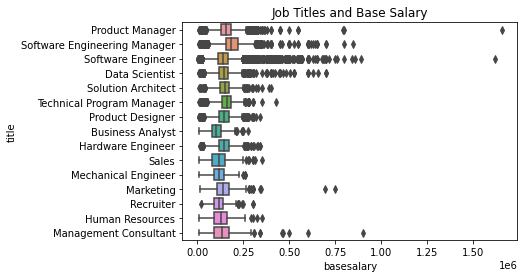

In [10]:
ax = sns.boxplot(x='basesalary', y='title',data = df, orient='h')
ax.set_title('Job Titles and Base Salary')

In [11]:
top10=df[['company','title', 'location']].value_counts()
top10.head(10)

company    title                         location         
Amazon     Software Engineer             Seattle, WA          2410
Microsoft  Software Engineer             Redmond, WA          1656
Google     Software Engineer             Mountain View, CA     919
Facebook   Software Engineer             Menlo Park, CA        859
Apple      Software Engineer             Cupertino, CA         737
Microsoft  Software Engineer             Seattle, WA           588
Amazon     Product Manager               Seattle, WA           564
Facebook   Software Engineer             Seattle, WA           406
Bloomberg  Software Engineer             New York, NY          405
Amazon     Software Engineering Manager  Seattle, WA           388
dtype: int64

In [12]:
#top10 companies listed
df['company'].value_counts().head(10)

Amazon        7664
Microsoft     4995
Google        4124
Facebook      2885
Apple         1948
Oracle        1087
Salesforce    1003
Intel          906
Cisco          877
Uber           847
Name: company, dtype: int64

In [13]:
#top10 job titles
df['title'].value_counts().head(10)

Software Engineer               39695
Product Manager                  4405
Software Engineering Manager     3339
Data Scientist                   2480
Hardware Engineer                2154
Product Designer                 1462
Technical Program Manager        1379
Solution Architect               1101
Management Consultant             976
Business Analyst                  882
Name: title, dtype: int64

In [14]:
#top10 locations
df['location'].value_counts().head(10)

Seattle, WA          8252
San Francisco, CA    6474
New York, NY         4433
Redmond, WA          2545
Mountain View, CA    2156
Sunnyvale, CA        2148
San Jose, CA         1970
Austin, TX           1483
Menlo Park, CA       1380
Cupertino, CA        1378
Name: location, dtype: int64

### Conclusion

The average base salary is ~$142,000. It looks like product managers, software engineers, and data scientists (yay!) are amongst the top most paid titles in data science and STEM salaries. Ngoc is relieved as she decided to pursue data scientst route. She is also relieved to see that out of the top 10 most frequently listed locations, 6 are located in the Bay Area where she lives. This gives her much hope that she will be able to find a job after finishing her data science bootcamp. However, a top priority for Ngoc when searching for a new company is manking sure she fits in well with the company culture. Going forward, if Glassdoor employee reviews or CEO ratings were also included, it would greatly enhance the quality of Ngoc's job search towards her new journey into the world of data science. In addition, some other questions that can be further explored is looking at base salary vs locations and salary vs. years of experience.